# Classification using FGW

In [1]:
import numpy as np
import os,sys
sys.path.append(os.path.realpath('../lib'))
from data_loader import load_local_data
from custom_svc import Graph_FGW_SVC_Classifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset_n='mutag'

In [3]:
path='../data/'
X,y=load_local_data(path,dataset_n,wl=2)

In [4]:
graph_svc=Graph_FGW_SVC_Classifier(C=1,gamma=2,alpha=1e-3,method='shortest_path',features_metric='hamming_dist',wl=2)

In [81]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=12)

In [6]:
%%time
graph_svc.fit(X_train,y_train)

CPU times: user 22.2 s, sys: 231 ms, total: 22.4 s
Wall time: 23 s


In [7]:
%%time
preds=graph_svc.predict(X_test)

CPU times: user 23.5 s, sys: 299 ms, total: 23.8 s
Wall time: 24.7 s


In [8]:
np.sum(preds==y_test)/len(y_test)

0.9206349206349206

In [6]:
graph_svc=Graph_FGW_SVC_Classifier(C=1,gamma=2,alpha=1,method='shortest_path',features_metric='hamming_dist',wl=2,amijo=True)

In [7]:
graph_svc.compute_all_distance(X_train,X_train)

In [8]:
D1=graph_svc.D

In [9]:
graph_svc=Graph_FGW_SVC_Classifier(C=1,gamma=2,alpha=1,method='shortest_path',features_metric='hamming_dist',wl=2,amijo=False)
graph_svc.compute_all_distance(X_train,X_train)

In [10]:
D2=graph_svc.D

In [12]:
np.max(np.abs(D1-D2))

5.553719008264586

In [13]:
np.mean(np.abs(D1-D2))

0.01735386891472773

In [14]:
dff=np.abs(D1-D2)

In [22]:
ind = np.unravel_index(np.argmax(dff, axis=None), dff.shape)

In [23]:
ind

(22, 49)

In [24]:
dff[22,49]

5.553719008264586

In [32]:
g1=X_train[22]
g2=X_train[49]

In [33]:
from ot_distances import Fused_Gromov_Wasserstein_distance

In [43]:
fgw=Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='hamming_dist',amijo=True,verbose=True)

In [44]:
fgw.graph_d(g1,g2)

It.  |Loss        |Delta loss
--------------------------------
    0|1.046824e+01|0.000000e+00
    1|6.630886e+00|-3.837354e+00
    2|6.383829e+00|-2.470569e-01
    3|6.169445e+00|-2.143839e-01
    4|6.100371e+00|-6.907427e-02
    5|6.099186e+00|-1.185072e-03
    6|6.099174e+00|-1.190015e-05
    7|6.099174e+00|-1.190065e-07
    8|6.099174e+00|-1.190067e-09
    9|6.099174e+00|-1.190337e-11


6.099173553719131

In [45]:
fgw=Fused_Gromov_Wasserstein_distance(alpha=1,features_metric='hamming_dist',amijo=False,verbose=True)

In [46]:
fgw.graph_d(g1,g2)

It.  |Loss        |Delta loss
--------------------------------
    0|1.046824e+01|0.000000e+00
    1|6.578512e+00|-3.889727e+00
    2|6.231405e+00|-3.471074e-01
    3|4.000000e+00|-2.231405e+00
    4|1.834711e+00|-2.165289e+00
    5|1.024793e+00|-8.099174e-01
    6|5.454545e-01|-4.793388e-01
    7|5.454545e-01|0.000000e+00


0.5454545454545454

In [56]:
from graph import draw_rel

In [59]:
import networkx as nx

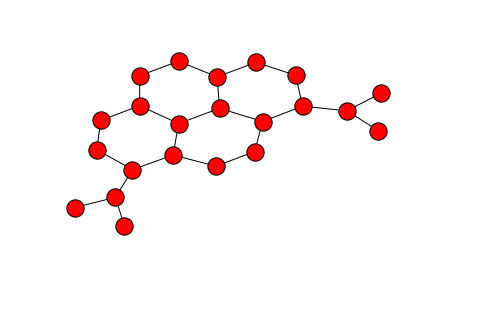

In [71]:
pos=nx.kamada_kawai_layout(g2.nx_graph)
nx.draw(g2.nx_graph,pos=pos)
plt.show()

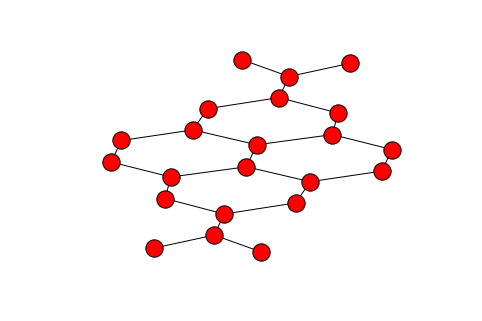

In [72]:
pos=nx.kamada_kawai_layout(g1.nx_graph)
nx.draw(g1.nx_graph,pos=pos)
plt.show()

In [80]:
nx.is_isomorphic(g1.nx_graph,g2.nx_graph)

False

In [74]:
len(g1.nodes())

22

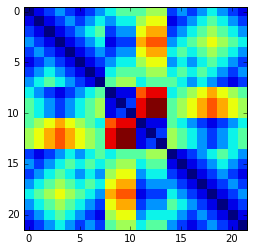

In [78]:
plt.imshow(g1.C,interpolation='nearest')
plt.show()

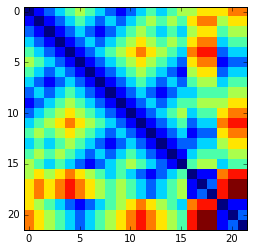

In [79]:
plt.imshow(g2.C,interpolation='nearest')
plt.show()

In [82]:
graph_svc=Graph_FGW_SVC_Classifier(C=1,gamma=2,alpha=1,method='shortest_path',features_metric='hamming_dist',wl=2,
                                  amijo=False)

In [83]:
graph_svc.fit(X_train,y_train)

In [84]:
preds=graph_svc.predict(X_test)

In [85]:
np.sum(preds==y_test)/len(y_test)

0.873015873015873

In [86]:
graph_svc=Graph_FGW_SVC_Classifier(C=1,gamma=2,alpha=1,method='shortest_path',features_metric='hamming_dist',wl=2,
                                  amijo=True)

In [87]:
graph_svc.fit(X_train,y_train)

In [88]:
preds=graph_svc.predict(X_test)

In [89]:
np.sum(preds==y_test)/len(y_test)

0.8888888888888888